In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
#import os
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr
import matplotlib.patches as patches
import os
import cartopy.mpl.ticker as cticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import re
import matplotlib.colors as mcolors
import datetime
import pandas as pd
import matplotlib.dates as mdates

In [2]:
#data import
ds_era = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/era5/2021.h5')
ds_era

<xarray.Dataset>
Dimensions:  (phony_dim_0: 1460, phony_dim_1: 20, phony_dim_2: 721,
              phony_dim_3: 1440)
Dimensions without coordinates: phony_dim_0, phony_dim_1, phony_dim_2,
                                phony_dim_3
Data variables:
    fields   (phony_dim_0, phony_dim_1, phony_dim_2, phony_dim_3) float32 ...

In [3]:
ds_era.fields[:,2,260:40:-1,720:1200]

<xarray.DataArray 'fields' (phony_dim_0: 1460, phony_dim_2: 220,
                            phony_dim_3: 480)>
[154176000 values with dtype=float32]
Dimensions without coordinates: phony_dim_0, phony_dim_2, phony_dim_3

In [4]:
start_time = pd.Timestamp('2021-01-01')
time_values = ds_era.fields['phony_dim_0'].values

In [5]:
# Convert integer time values to datetime objects
datetime_index = pd.to_datetime(start_time) + pd.to_timedelta(time_values*6, unit='h')

In [6]:
np.shape(datetime_index)

(1460,)

In [7]:
data_with_datetime = ds_era.fields[:,2,260:40:-1,720:1200].copy()

In [8]:
data_with_datetime

<xarray.DataArray 'fields' (phony_dim_0: 1460, phony_dim_2: 220,
                            phony_dim_3: 480)>
[154176000 values with dtype=float32]
Dimensions without coordinates: phony_dim_0, phony_dim_2, phony_dim_3

In [9]:
data_with_datetime['phony_dim_0'] = datetime_index

In [10]:
data_with_datetime

<xarray.DataArray 'fields' (phony_dim_0: 1460, phony_dim_2: 220,
                            phony_dim_3: 480)>
[154176000 values with dtype=float32]
Coordinates:
  * phony_dim_0  (phony_dim_0) datetime64[ns] 2021-01-01 ... 2021-12-31T18:00:00
Dimensions without coordinates: phony_dim_2, phony_dim_3

In [11]:
# Resample to daily frequency and compute the daily maximum
era_daily_max = data_with_datetime.resample(phony_dim_0='1D').max()

In [12]:
%store era_daily_max

Stored 'era_daily_max' (DataArray)


In [13]:
era_daily_max_mean = np.mean(era_daily_max[:,61:141,194:274], axis=(1, 2))
%store era_daily_max_mean

Stored 'era_daily_max_mean' (DataArray)


In [14]:
sumer_era_daily_max_mean = era_daily_max_mean.sel(phony_dim_0 = slice( '2021-06-01','2021-09-01'))
sumer_era_daily_max_mean.max()

<xarray.DataArray 'fields' ()>
array(302.84042358)

In [15]:
start_date = '2021-06-01'
end_date = '2021-09-01'
time_interval = '1D'
time_range = pd.date_range(start=start_date, end=end_date, freq=time_interval)
time_range

DatetimeIndex(['2021-06-01', '2021-06-02', '2021-06-03', '2021-06-04',
               '2021-06-05', '2021-06-06', '2021-06-07', '2021-06-08',
               '2021-06-09', '2021-06-10', '2021-06-11', '2021-06-12',
               '2021-06-13', '2021-06-14', '2021-06-15', '2021-06-16',
               '2021-06-17', '2021-06-18', '2021-06-19', '2021-06-20',
               '2021-06-21', '2021-06-22', '2021-06-23', '2021-06-24',
               '2021-06-25', '2021-06-26', '2021-06-27', '2021-06-28',
               '2021-06-29', '2021-06-30', '2021-07-01', '2021-07-02',
               '2021-07-03', '2021-07-04', '2021-07-05', '2021-07-06',
               '2021-07-07', '2021-07-08', '2021-07-09', '2021-07-10',
               '2021-07-11', '2021-07-12', '2021-07-13', '2021-07-14',
               '2021-07-15', '2021-07-16', '2021-07-17', '2021-07-18',
               '2021-07-19', '2021-07-20', '2021-07-21', '2021-07-22',
               '2021-07-23', '2021-07-24', '2021-07-25', '2021-07-26',
      

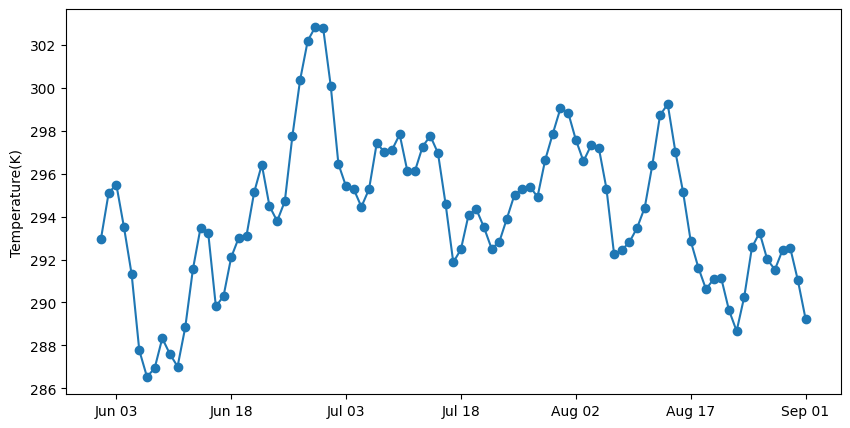

In [17]:
fig2 = plt.figure(figsize=(10,5))
plt.plot(time_range,sumer_era_daily_max_mean,linestyle ='-',marker = 'o' )

# Set the plot title and labels

plt.ylabel('Temperature(K)')
plt.xticks(time_range)
# Set the locator for the x-axis ticks
locator = mdates.DayLocator(interval=15)
plt.gca().xaxis.set_major_locator(locator)

# Format the x-axis tick labels
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

#plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) # Adjust the date format as needed
#plt.xticks(rotation=45)
#make the x axis tick evenly distributed
#point out the highest point?
#plot seperately or together?
# Display the plot

plt.savefig('/home/kit/imk-tro/gj5173/29.08_modified/T2m_daily_max_ts.png', bbox_inches='tight',dpi=100)#
plt.show()